In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("/home1/smaruj/akitaX1-analyses/figures/plot_styles/global_plotting_style.mplstyle")

from scipy.stats import pearsonr, spearmanr
import bioframe
import bbi
import pingouin as pg

import sys
sys.path.insert(0, "/home1/smaruj/akitaX1-analyses/utils/")
from reading_averaging_utils import read_disruption_smf_data

In [3]:
# directory with data
data_dir = "/project/fudenber_735/akitaX1_analyses_data/genomic_disruption/disruptions_vs_features/"

In [4]:
df_ave = read_disruption_smf_data(data_dir)

In [5]:
# data with the SMF experiment results
binding_frequencies = pd.read_table("/home1/smaruj/akitaX1-analyses/input_data/sonmezer2021_SMF_CTCF_binding_data/binding.frequencies.tsv",sep="\t")

In [5]:
# import matplotlib.pyplot as plt

# # Assuming binding_frequencies is your DataFrame and is already defined

# # Filter the DataFrame for rows where the biological state is "Bound" and select the "Freqs" column
# bound_freqs = binding_frequencies[binding_frequencies["biological.state"] == "Bound"]["Freqs"]

# # Create the histogram
# plt.figure(figsize=(10, 6))
# plt.hist(bound_freqs, bins=20, color='skyblue', edgecolor='black')

# # Adding labels and title
# plt.xlabel('Frequency', fontsize=12)
# plt.ylabel('Count', fontsize=12)
# plt.title('Histogram of Binding Frequencies for "Bound" Biological State', fontsize=14)

# plt.show()

In [6]:
# merging data based on the TFBS_cluster
df = df_ave.merge(binding_frequencies[binding_frequencies["biological.state"] == "Accessible"][["TFBS_cluster", "Freqs"]], on=["TFBS_cluster"], how="left")
df = df.rename(columns={"Freqs": "freq_accessible"})
df = df.merge(binding_frequencies[binding_frequencies["biological.state"] == "Bound"][["TFBS_cluster", "Freqs"]], on=["TFBS_cluster"], how="left")
df = df.rename(columns={"Freqs": "freq_bound"})

In [7]:
df.fillna(0, inplace=True)

In [8]:
df

,SCD_m0,chrom,end,phyloP,rmsk,TFBS_cluster,PWM_score,start,strand,INS-16_m0,...,INS-16_m2,INS-64_m2,SCD_m3,INS-16_m3,INS-64_m3,SCD,INS-16,INS-64,freq_accessible,freq_bound
0,7.500000,chr1,9541431,-0.022579,False,TFBS_1000,13.2902,9541413,-,0.034668,...,0.048340,0.050781,6.285156,0.033691,0.036133,7.578125,0.037720,0.039062,0.503958,0.226913
1,3.201172,chr1,9541487,0.385316,False,TFBS_1001,13.2902,9541469,-,0.013184,...,0.022461,0.024902,3.685547,0.016602,0.019531,3.248047,0.015259,0.017822,0.578275,0.271565
2,24.015625,chr1,9545352,0.913684,False,TFBS_1002,17.1224,9545334,-,0.102539,...,0.089844,0.102539,25.265625,0.110107,0.140625,23.812500,0.102112,0.111938,0.742331,0.214724
3,16.453125,chr1,11140123,-0.025105,False,TFBS_1005,13.0579,11140105,-,0.043732,...,0.055237,0.070801,11.937500,0.039307,0.049438,14.757812,0.049255,0.059570,0.390026,0.052430
4,0.686035,chr1,13134487,0.300947,False,TFBS_1010,16.7955,13134469,-,0.000366,...,0.007568,0.005005,2.474609,0.014282,0.013184,3.232422,-0.001892,-0.002930,0.667360,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,51.781250,chr19,60144549,2.567421,False,TFBS_29317,17.8472,60144531,-,0.263672,...,0.266846,0.283203,47.843750,0.197266,0.263428,48.843750,0.234619,0.273438,0.287356,0.574713
9987,3.468750,chr19,60161089,1.536789,False,TFBS_29318,17.3056,60161071,-,0.019043,...,0.022949,0.036621,8.070312,0.028198,0.039551,7.265625,0.026154,0.032410,0.357143,0.349206
9988,23.484375,chr19,60310806,1.475263,False,TFBS_29319,18.2240,60310788,-,0.131958,...,0.103333,0.118225,22.234375,0.098022,0.110474,20.953125,0.106079,0.111450,0.597561,0.341463
9989,17.453125,chr19,60341696,2.085368,False,TFBS_29321,20.4797,60341678,-,0.077209,...,0.095154,0.119568,22.046875,0.099792,0.132324,21.937500,0.095825,0.121948,0.316667,0.600000


In [8]:
seq_coords_df_expaned = bioframe.expand(bioframe.expand(df, scale=0),pad=100)

In [9]:
# adding ChIP-seq data

chip_dict = {
'justice_2020_CTCF':'/project/fudenber_735/GEO/justice_2020_GSE137272/mm10/GSE137272_CTCF-ChIPseq.bw',
'hansen_2019_CTCF':'/project/fudenber_735/GEO/hansen_2019_GSE123636/mm10/GSM3508478_C59_CTCF.bw',
'justice_2020_Rad21':'/project/fudenber_735/GEO/justice_2020_GSE137272/mm10/GSE137272_Rad21-ChIPseq.bw',
'hansen_2017_Rad21':'/project/fudenber_735/GEO/hansen_2017_GSE90994/mm10/GSM2418859_WT_Rad21.bw'
}

for chip in chip_dict:
    print('calculating ',chip)
    with bbi.open( chip_dict[chip] ) as BBIFile:
        chip_values = BBIFile.stackup(
                        seq_coords_df_expaned['chrom'], 
                        seq_coords_df_expaned['start'], 
                        seq_coords_df_expaned['end'], 
                        bins=1, summary='sum')
    df[chip] = chip_values
    
print('done')

calculating  justice_2020_CTCF
calculating  hansen_2019_CTCF
calculating  justice_2020_Rad21
calculating  hansen_2017_Rad21
done


# Scatterplots

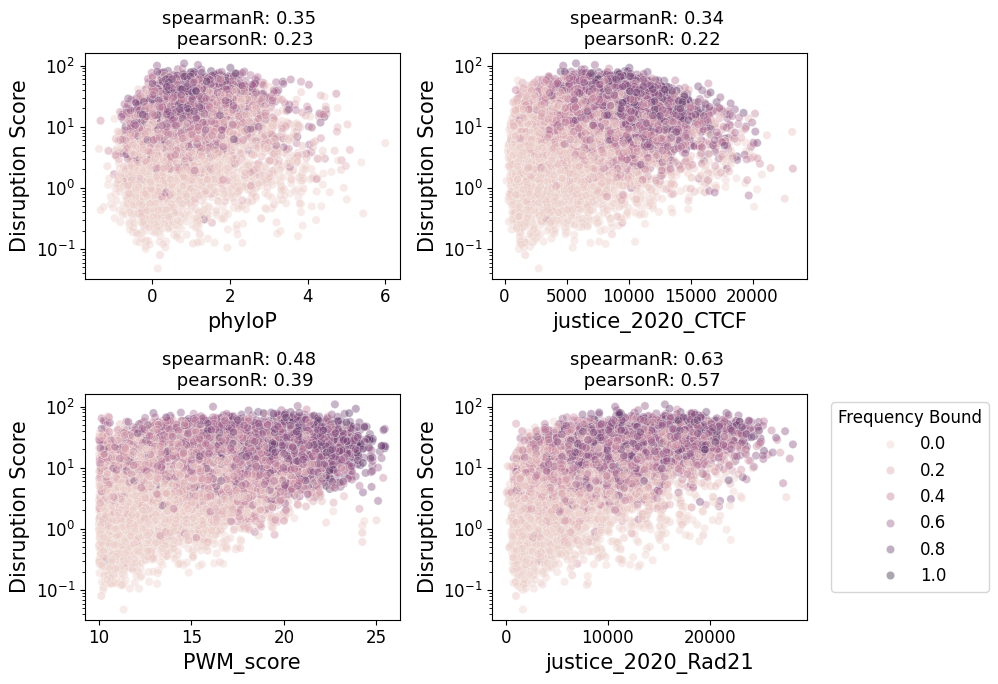

In [10]:
i = 0
plt.figure(figsize=(12, 7))
for key in ['phyloP', 'justice_2020_CTCF', 'PWM_score', "justice_2020_Rad21"]:
    i += 1
    plt.subplot(2, 2, i)
    
    # Plot without legend for the first three plots, and add legend only for the last plot
    if i < 4:
        sns.scatterplot(data=df, x=key, y='SCD', hue='freq_bound', alpha=0.4, legend=False)
    else:
        scatter = sns.scatterplot(data=df, x=key, y='SCD', hue='freq_bound', alpha=0.4)
        # For the last plot, generate the legend outside
        plt.legend(title='Frequency Bound', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.semilogy()
    plt.xlabel(key, fontsize=15)
    plt.ylabel('Disruption Score', fontsize=15)
    
    s = np.round(spearmanr(df[key], df['SCD'])[0], 2)
    p = np.round(pearsonr(df[key], df['SCD'])[0], 2)
    
    plt.title(f'spearmanR: {s} \n pearsonR: {p}')

plt.tight_layout(rect=[0, 0, 0.85, 1])
# plt.savefig("./plots/disruption_score_scatterplots.pdf", format="pdf", bbox_inches="tight")

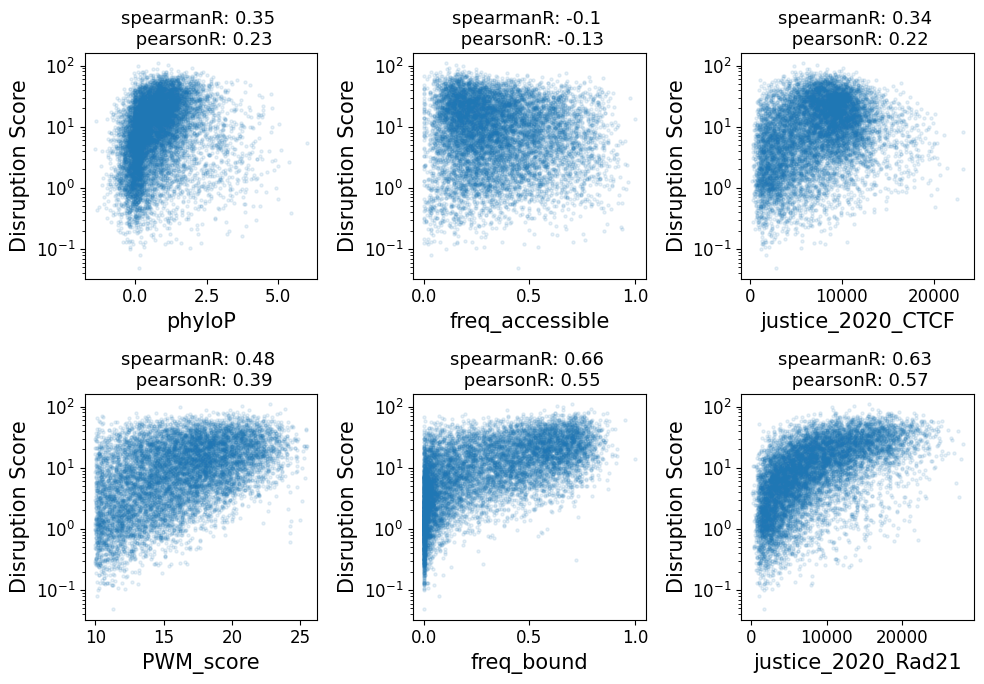

In [11]:
i = 0
plt.figure(figsize=(10,7))
for key in ['phyloP', 'freq_accessible', 'justice_2020_CTCF', 'PWM_score', 'freq_bound', "justice_2020_Rad21"]:
    i+=1
    #plt.figure(figsize=(4,3))
    plt.subplot(2,3,i)
    plt.scatter(df[key], df['SCD'], 5, alpha=0.1 )
    plt.semilogy()
    
    plt.xlabel(key, fontsize=15)  # Increase fontsize for x label
    plt.ylabel('Disruption Score', fontsize=15)  # Increase fontsize for y label

    
    s = np.round(spearmanr(df[key], df['SCD'], )[0] ,2)
    p = np.round(pearsonr(df[key], df['SCD'], )[0] ,2)
    
    plt.title(f'spearmanR: {s} \n pearsonR: {p}')#,str(s)

plt.tight_layout()
# plt.savefig("./plots/disruption_score_scatterplots_alt.pdf", format="pdf", bbox_inches="tight")

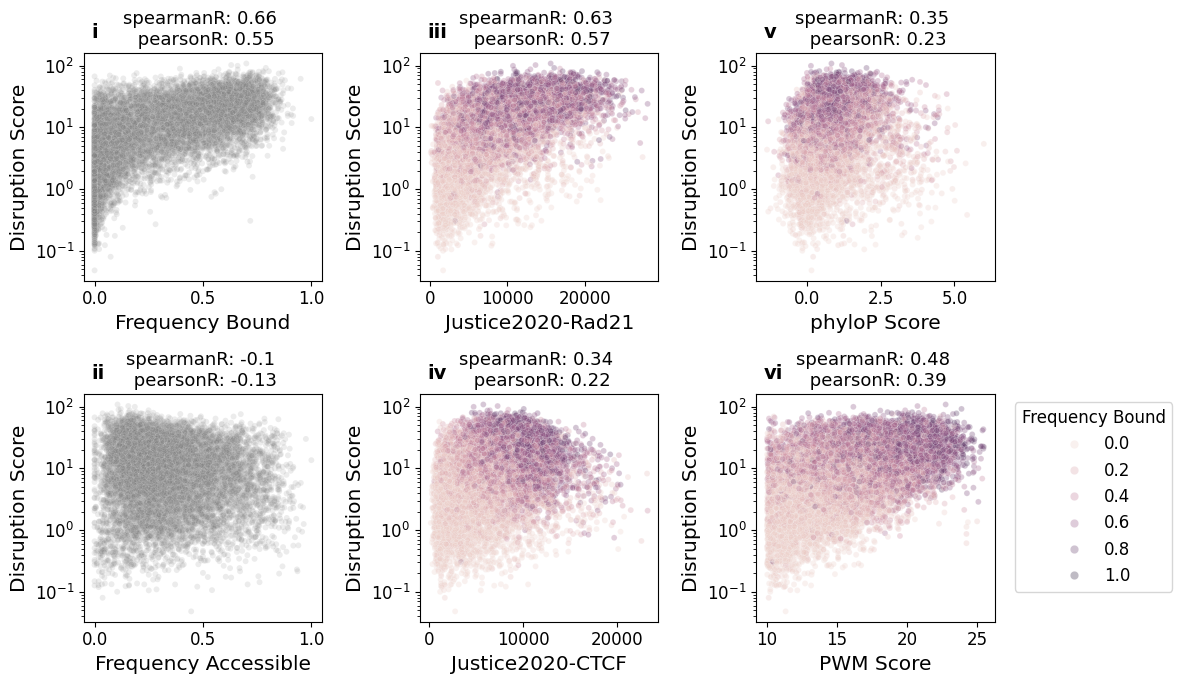

In [13]:

# combined plot

plt.figure(figsize=(12, 7))
panel_labels = ['i', 'iii', 'v', 'ii', 'iv', 'vi']  # Labels for each subplot
i = 0

feature_labels = ['Frequency Bound', 'Justice2020-Rad21', 'phyloP Score', 'Frequency Accessible', 'Justice2020-CTCF', 'PWM Score']

for key in ['freq_bound', 'justice_2020_Rad21', 'phyloP', 'freq_accessible', 'justice_2020_CTCF', 'PWM_score']:
    i += 1
    plt.subplot(2, 3, i)
    
    # Plot without legend for the first three plots, and add legend only for the last plot
    if i < 6:
        if i == 1 or i == 4:
            sns.scatterplot(data=df, x=key, y='SCD', alpha=0.15, size=5, legend=False, color="grey")
        else:
            sns.scatterplot(data=df, x=key, y='SCD', hue='freq_bound', size=5, alpha=0.3, legend=False)
    else:
        scatter = sns.scatterplot(data=df, x=key, y='SCD', hue='freq_bound', alpha=0.3, size=5)
        # For the last plot, generate the legend outside
        handles, labels = scatter.get_legend_handles_labels()
        plt.legend(handles[:-1], labels[:-1], title='Frequency Bound', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.semilogy()
    plt.xlabel(feature_labels[i-1], fontsize=14.5)
    plt.ylabel('Disruption Score', fontsize=14.5)
    
    s = np.round(spearmanr(df[key], df['SCD'])[0], 2)
    p = np.round(pearsonr(df[key], df['SCD'])[0], 2)
    
    plt.title(f'spearmanR: {s} \n pearsonR: {p}')
    
    # Add panel labels above each subplot
    plt.text(0.03, 1.05, panel_labels[i-1], transform=plt.gca().transAxes, fontsize=14, verticalalignment='bottom', weight='bold')

plt.tight_layout()
# plt.savefig("./plots/disruption_score_scatterplots_combined.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Correlation Matrix

In [14]:
# picking data for the next plots
sonmezer_stats = ["freq_accessible", "freq_bound", "phyloP", "PWM_score"] 
keys = ["SCD"] + sonmezer_stats + list(chip_dict.keys())

In [15]:
labels = ['Disruption Score',
 'Frequency Accessible',
 'Frequency Bound',
 'phyloP Score',
 'PWM Score',
 'Justice2020-CTCF',
 'Hansen2019-CTCF',
 'Justice2020-Rad21',
 'Hansen2017-Rad21']

Text(0, 0.5, 'correlation')

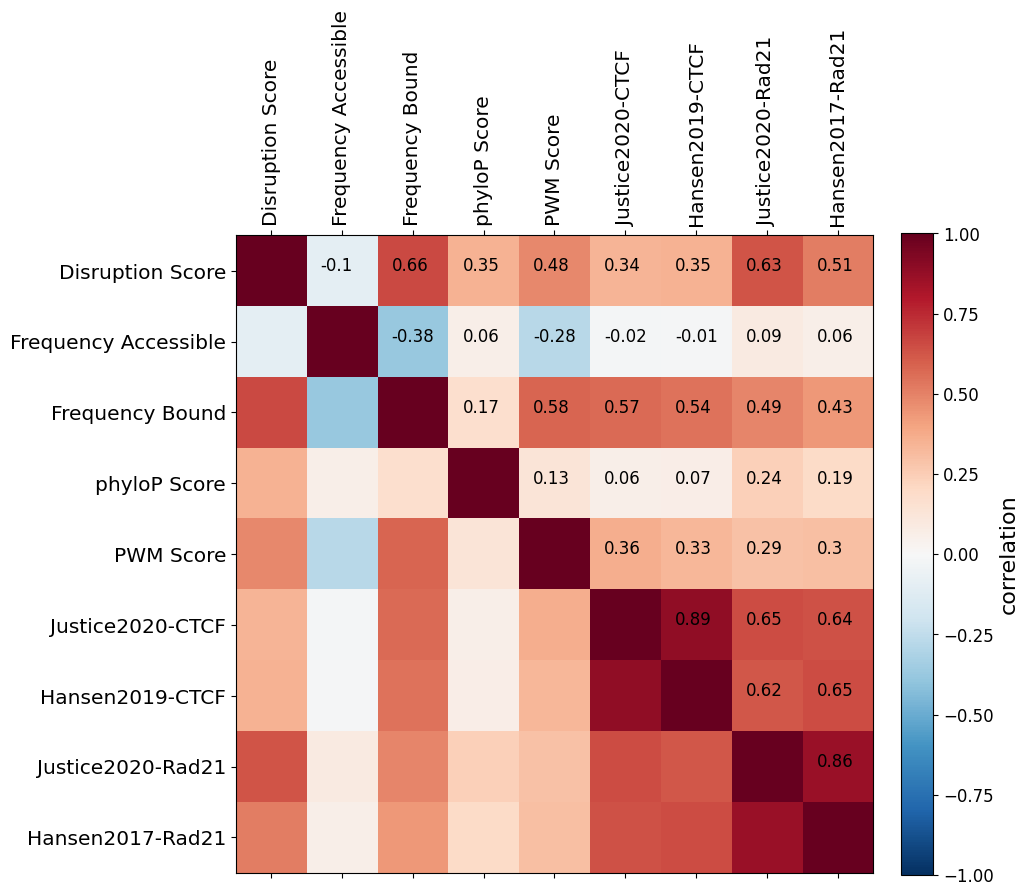

In [16]:
figwidth = 9
plt.figure(figsize=(figwidth,figwidth))

corr_mat = np.round(spearmanr(df[keys].values)[0],2)

plt.matshow(
    corr_mat,
    fignum=False,
    cmap='RdBu_r',
    vmin=-1,vmax=1

); 
for i in range(len(keys)):
    for j in range(len(keys)):
        if i <=j:continue
        plt.text( i - 0.3 ,j,  str(corr_mat[i,j]),
                   color='k',fontsize=12 )
        
plt.xticks(np.arange(len(keys)), labels, rotation=90, fontsize=14.5)
plt.yticks(np.arange(len(keys)), labels, fontsize=14.5)

cbar = plt.colorbar(label='correlation', fraction=0.046, pad=0.04)
cbar.ax.set_ylabel('correlation', rotation=90, fontsize=16)
# plt.savefig("./plots/disruption_score_correlation_matrix.pdf", format="pdf", bbox_inches="tight")

# Partial Correlation

In [17]:
partial_correlation_1_keys = ["SCD", "freq_bound", "phyloP", "PWM_score", "justice_2020_CTCF", "justice_2020_Rad21"]
partial_correlation_2_keys = ["SCD", "freq_bound", "phyloP", "PWM_score", "hansen_2019_CTCF", "hansen_2017_Rad21"]

In [18]:
corr_mat_1 = df[partial_correlation_1_keys].pcorr().round(3).values

In [19]:
# This method computes pairwise partial correlations of all variables in the DataFrame, controlling for all other variables in each calculation.

In [20]:
corr_mat_2 = df[partial_correlation_2_keys].pcorr().round(3).values

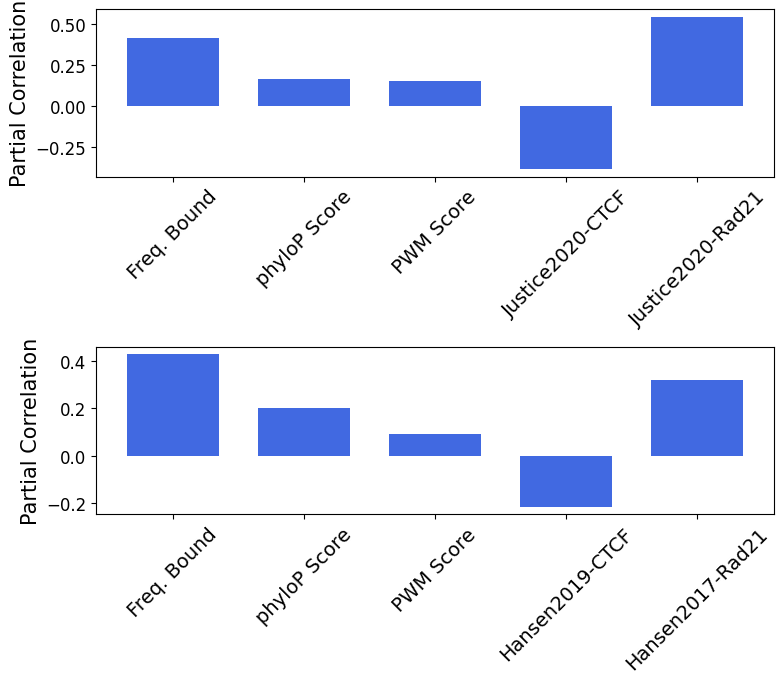

In [21]:
values1 = [corr_mat_1[0, 1], corr_mat_1[0, 2], corr_mat_1[0, 3], corr_mat_1[0, 4], corr_mat_1[0, 5]]
x_labels1 = ["Freq. Bound", "phyloP Score", "PWM Score", "Justice2020-CTCF", "Justice2020-Rad21"]

values2 = [corr_mat_2[0, 1], corr_mat_2[0, 2], corr_mat_2[0, 3], corr_mat_2[0, 4], corr_mat_2[0, 5]]
x_labels2 = ["Freq. Bound", "phyloP Score", "PWM Score", "Hansen2019-CTCF", "Hansen2017-Rad21"]

# Setting up the figure and subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 7))  # 2 rows, 1 column

# Plotting the first set of data on the first subplot
axes[0].bar(x_labels1, values1, width=0.7, color="royalblue")
axes[0].set_ylabel('Partial Correlation', fontsize=15)
axes[0].tick_params(axis='x', labelsize=14, rotation=45)

# Plotting the second set of data on the second subplot
axes[1].bar(x_labels2, values2, width=0.7, color="royalblue")
axes[1].set_ylabel('Partial Correlation', fontsize=15)
axes[1].tick_params(axis='x', labelsize=14, rotation=45)

plt.tight_layout()

# plt.savefig("./plots/disruption_score_partial_corelations.pdf", format="pdf")

plt.tight_layout()  # Adjust layout
plt.show()